Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/5
45/45 [==============================] - 720s 16s/step - loss: 1.5333 - accuracy: 0.2833 - val_loss: 1.3991 - val_accuracy: 0.2716
Epoch 2/5
45/45 [==============================] - 700s 16s/step - loss: 1.3831 - accuracy: 0.3139 - val_loss: 1.4131 - val_accuracy: 0.3452
Epoch 3/5
45/45 [==============================] - 693s 15s/step - loss: 1.3490 - accuracy: 0.3293 - val_loss: 1.4056 - val_accuracy: 0.3173
Epoch 4/5
45/45 [==============================] - 695s 15s/step - loss: 1.2997 - accuracy: 0.3446 - val_loss: 1.4465 - val_accuracy: 0.3401
Epoch 5/5
45/45 [==============================] - 711s 16s/step - loss: 1.2655 - accuracy: 0.3850 - val_loss: 1.4832 - val_accuracy: 0.3122


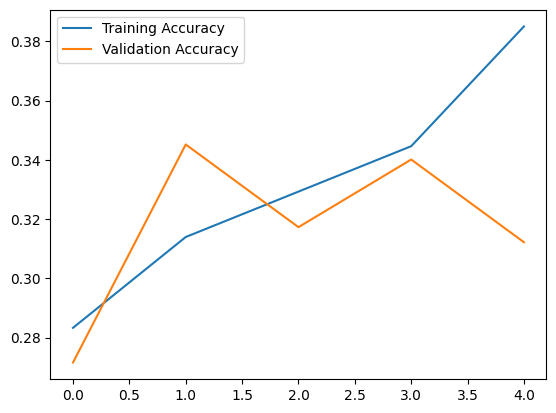

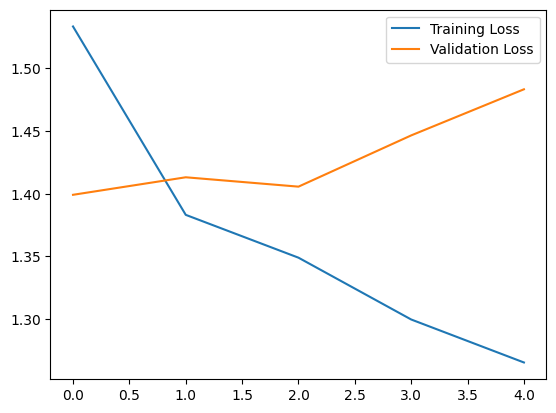

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the directories for train and test data
train_dir = '/content/drive/MyDrive/brain tumor dataset/train'
test_dir = '/content/drive/MyDrive/brain tumor dataset/test'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Data normalization for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'  # Set class_mode to 'categorical' for multi-class classification
)

# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'  # Set class_mode to 'categorical' for multi-class classification
)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 units for 4 categories

# Create a new model by combining the base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 5 epochs
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=test_generator, validation_steps=len(test_generator))

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('\nTest accuracy:', test_acc)

7/7 [==============================] - 107s 12s/step - loss: 1.4832 - accuracy: 0.3122

Test accuracy: 0.312182754278183



# **KESIMPULAN**
Model ResNet yang telah dilatih pada dataset tumor otak saat ini memiliki akurasi yang rendah pada data uji, sekitar 31.22%.

Ini menunjukkan bahwa model ini belum cocok dengan dataset tumor otak yang digunakan. Ada beberapa faktor yang mungkin berkontribusi terhadap kinerja rendah model ini, termasuk ukuran dataset yang kecil, konfigurasi model yang belum dioptimalkan, atau kurangnya penyesuaian hyperparameter.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
